In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import sys

sys.path.append("..")

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
from util.spike_trains import get_GWN, get_poisson_spike_train
from scipy.stats import poisson
from util.plotting import plot_volt_trace

<IPython.core.display.Javascript object>

In [4]:
plt.rcParams["figure.figsize"] = (16, 8)

<IPython.core.display.Javascript object>

In [205]:
class LIF:
    def __init__(self, dt: float):

        self.dt = dt

        self.E_l = -65.0  # resting potential
        self.v_th = -55.0  # threshold
        self.v_reset = -65.0  # v_reset
        self.tau_m = 10.0  # membrane time constant -> given by TODO
        self.R = 40  # resistance

        self.spikes = []
        self.voltages = [self.E_l]

        self.tau_syn_e = 2.0
        self.tau_syn_i = 5.0

        self.E_e = 0.0
        self.E_i = -80.0

        self.gE_bar = 2.4
        self.gI_bar = 2.4

        self.exc_inps = [0]
        self.inh_inps = [0]

        self.t_ref = 5.0
        self.ref_count = 0.0

    def step(
        self,
        exc_inp: Union[float, int],
        inh_inp: Union[float, int],
        ext_inp: Union[float, int],
    ):
        # get synaptic conductance change
        d_exc = (self.dt / self.tau_syn_e) * self.exc_inps[
            -1
        ] + self.gE_bar * exc_inp.sum()

        d_inh = (self.dt / self.tau_syn_i) * self.inh_inps[
            -1
        ] + self.gI_bar * inh_inp.sum()

        exc = self.exc_inps[-1] - d_exc
        inh = self.inh_inps[-1] - d_inh

        if self.ref_count > 0:
            v = self.v_reset
            self.ref_count -= 1

        elif self.voltages[-1] >= self.v_th:
            self.spikes = self.spikes + [len(self.voltages)]
            v = self.v_reset
            self.ref_count = self.t_ref / self.dt

        else:
            # fmt: off
            
            
            # get membrane voltage change
            dv = (self.dt / self.tau_m) \
                 * ((self.E_l - self.voltages[-1]) \
                 - ((exc / self.R) * (self.voltages[-1] - self.E_e)) \
                 - ((inh / self.R) * (self.voltages[-1] - self.E_i)) \
                 + (ext_inp / self.R))
            # fmt: on

            # update membrane voltage
            v = self.voltages[-1] + dv

        # update synaptic conductance
        self.exc_inps += [exc]
        self.inh_inps += [inh]

        self.voltages += [v]

<IPython.core.display.Javascript object>

In [139]:
mu = 0.1
dt = 0.1
size = 5000
np.random.seed(seed=1)
ips = poisson.rvs(0.2, size=size - 1)
ips[ips > 0] = 1
ips *= 10

<IPython.core.display.Javascript object>

In [202]:
exc_spike_train = get_poisson_spike_train(
    rate=10, no_spikes=80, no_spike_trains=size, dt=dt
)
inh_spike_train = get_poisson_spike_train(
    rate=10, no_spikes=20, no_spike_trains=size, dt=dt
)

<IPython.core.display.Javascript object>

In [203]:
ips = np.zeros(size - 1)
ips[500:1000] = 1000

<IPython.core.display.Javascript object>

no of spikes: 4


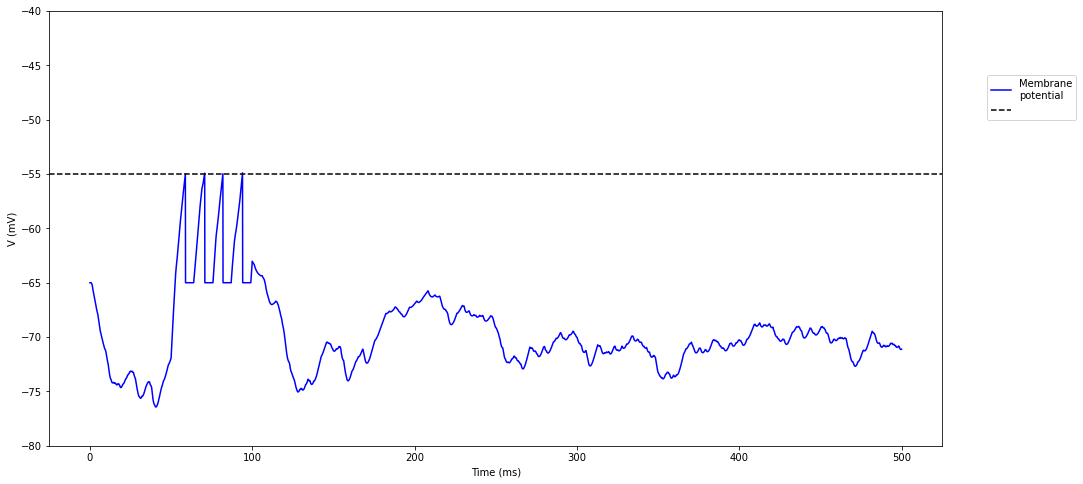

<IPython.core.display.Javascript object>

In [204]:
lif = LIF(dt=dt)

for exc, inh, ext in zip(
    exc_spike_train.swapaxes(0, 1), inh_spike_train.swapaxes(0, 1), ips
):
    lif.step(exc, inh, ext)

plot_volt_trace(lif.voltages, lif.v_th, dt=dt, sim_length=size)
print(f"no of spikes: {len(lif.spikes)}")

In [170]:
u_rand = np.random.rand(2, 100000)
u_rand

array([[0.21762663, 0.32537107, 0.38094702, ..., 0.72267534, 0.50626702,
        0.03088578],
       [0.67501762, 0.67388924, 0.89417787, ..., 0.52370227, 0.48619703,
        0.2328381 ]])

<IPython.core.display.Javascript object>

In [171]:
(u_rand < 10 * (0.1 / 1000))

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

<IPython.core.display.Javascript object>

In [164]:
0.1 / 1000

0.0001

<IPython.core.display.Javascript object>